# Part II - Visualizing FordGoBike Data
## by: Khaled Zoheir

## Investigation Overview


> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.

> Two differnet perspectives (pupose) of the analysis:Business Perspective: Our main customers are the Subscibers

> Operation Perspective: We need to transport some bikes (carrting them using a truck or so) from high end stations to high start stations during peak hours: E.g.: Mon-Fri from 7-9 am: Move bikes from: `San Francisco Caltrain (Townsend St at 4th St)` to:`San Francisco Caltrain (Townsend St at 4th St)` station

## Dataset Overview

> Udacity provided a link to the dataset. After some work, I found this was for one month only (Feb). Looked at knowledge base: https://knowledge.udacity.com/questions/668930 and them got the files from: https://s3.amazonaws.com/baywheels-data/index.html. This is slightly different dataset with some of the features are missing and others are present

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
from glob import glob
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")


In [2]:
# load in the dataset into a pandas dataframe
all_months = glob('*.csv')
list_data_frame = [pd.read_csv(month, low_memory=False) for month in all_months]
df_bike_trips = pd.concat(list_data_frame, ignore_index=True)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [3]:
df_bike_trips.dropna(subset=['start_station_id' , 'start_station_name', 'end_station_id', 'end_station_name'], inplace=True)
df_bike_trips['start_time'] = pd.to_datetime(df_bike_trips['start_time'])
df_bike_trips['end_time'] = pd.to_datetime(df_bike_trips['end_time'])

df_bike_trips['start_station_id'] = df_bike_trips['start_station_id'].astype('str')
df_bike_trips['end_station_id'] = df_bike_trips['end_station_id'].astype('str')
df_bike_trips['bike_id'] = df_bike_trips['bike_id'].astype('str')

df_bike_trips['user_type'] = df_bike_trips['user_type'].astype('category')
df_bike_trips['rental_access_method'] = df_bike_trips['rental_access_method'].astype('category')

df_bike_trips['day_of_the_year'] = df_bike_trips['start_time'].dt.dayofyear
df_bike_trips['hour_of_day'] = df_bike_trips['start_time'].dt.hour
df_bike_trips['day_of_week'] = df_bike_trips['start_time'].dt.dayofweek
df_bike_trips['working_day'] = np.where(df_bike_trips['start_time'].dt.dayofweek < 5, True, False)
df_bike_trips['month'] = df_bike_trips['start_time'].dt.month
df_bike_trips['duration_min'] = df_bike_trips['duration_sec']/60

In [4]:
from math import radians, cos, sin, asin, sqrt
def g_distance(lat1, lat2, lon1, lon2):
    # The math module contains a function named
    # radians which converts from degrees to radians.

    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)
df_bike_trips['ground_distance'] = df_bike_trips.apply(lambda x: g_distance(x["start_station_latitude"], x["end_station_latitude"], x["start_station_longitude"], x["end_station_longitude"]), axis=1)

df_bike_trips['day_of_the_year'] = df_bike_trips['day_of_the_year'].astype('category')
#df_bike_trips['hour_of_day'] = df_bike_trips['hour_of_day'].astype('category') # This is better to be left as numeric
df_bike_trips['day_of_week'] = df_bike_trips['day_of_week'].astype('category')
df_bike_trips['working_day'] = df_bike_trips['working_day'].astype('bool')
df_bike_trips['month'] = df_bike_trips['month'].astype('category')

df_bike_trips.drop(['duration_sec'], inplace =True, axis=1)

In [5]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
week_day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
global_sample = False # If True it will display a sample of the data for program syntax testing. If False will work with the whole dataframe
def bar_graph_single_feature (df, feature, suptitle, x_label, xticks = "", color_palette =4, sample=False):
    base_color = sb.color_palette()[color_palette]
    graph = sb.catplot(data = (df if sample == False else df.sample(n=100)), x = feature, kind = 'count', aspect = 1.7, color = base_color);

    graph.set_axis_labels(x_label, 'Number of Bike Trips'),

    graph.fig.suptitle(suptitle, y = 1.05, fontsize = 16, fontweight = 'bold')

    if (xticks!= ''):
        graph.set_xticklabels(xticks, rotation=75)

Hello


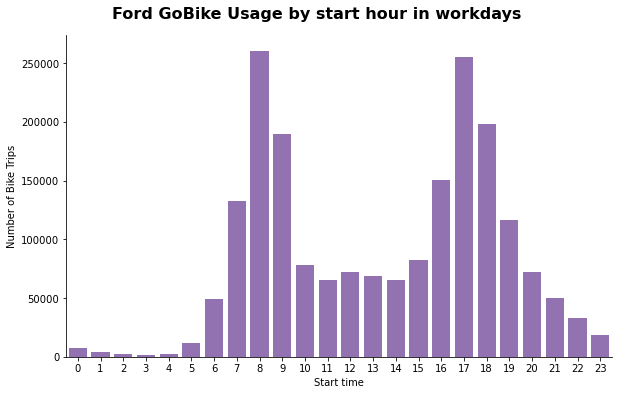

In [6]:
print("Hello")
bar_graph_single_feature (df_bike_trips[df_bike_trips.working_day == True], feature='hour_of_day', suptitle='Ford GoBike Usage by start hour in workdays', x_label='Start time', xticks='', sample=False)

## Thank you


>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [7]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 636132 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\tekom\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\tekom\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\tekom\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\tekom\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\tekom\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(notebook_

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 